In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [3]:
#create known parameters
weight = 0.7
bias = .3

#create data
start = 0
end = 1
step = .02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias
x[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
#spliting data into training and testing sets
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data=x_train, 
                     train_labels=y_train, 
                     test_data=x_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

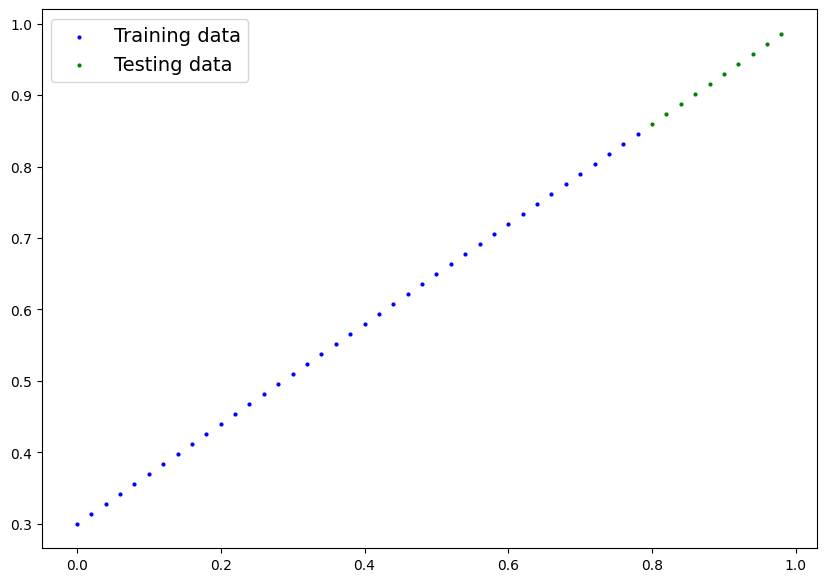

In [6]:
plot_predictions();

In [7]:
#create a model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        #weights
        self.weights = nn.Parameter(torch.randn(1,
        requires_grad=True,
        dtype=torch.float
        ))
        #bias
        self.bias = nn.Parameter(torch.randn(1,
        requires_grad=True,
        dtype=float
        ))

    #forward propagation
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return x * self.weights + self.bias

In [11]:
#view details of model
torch.manual_seed(0)

#instance of model
model_0 = LinearRegressionModel()

#check the nn parameters
list(model_0.parameters())

#state of the model
print(model_0.state_dict())

OrderedDict([('weights', tensor([1.5410])), ('bias', tensor([-0.2934], dtype=torch.float64))])


In [14]:
#making predictions with our model

with torch.inference_mode():
    y_preds = model_0(x_test)

In [15]:
#view predictions

print(f"Number of test samples: {len(x_test)}")
print(f"Number of predictions: {len(y_preds)}")
print(f"Predictions: {y_preds}")

Number of test samples: 10
Number of predictions: 10
Predictions: tensor([[0.9394],
        [0.9702],
        [1.0010],
        [1.0318],
        [1.0626],
        [1.0935],
        [1.1243],
        [1.1551],
        [1.1859],
        [1.2167]], dtype=torch.float64)


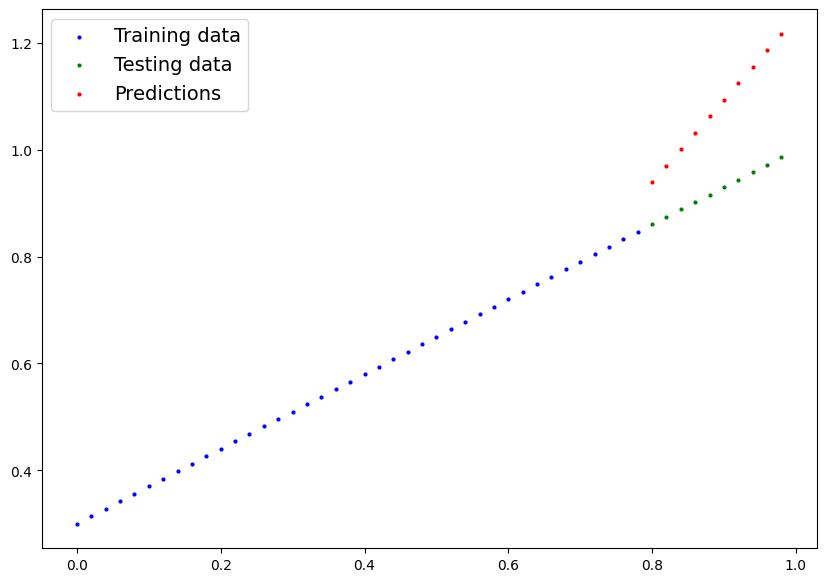

In [16]:
#plotting predictions
plot_predictions(predictions=y_preds)

In [18]:
#calculating loss and implmenting the loss function and optimizer
#using SGD (stochastic gradient descent ) -> for regression problem

loss_fn = nn.L1Loss() # loss function MAE

#optimizer 
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) 

In [28]:
#training the model

#number of epochs for model to go through the training data
epochs = 500

#empty lists to hold loss values
train_loss_values, test_loss_values, epoch_count = [], [], []

for epoch in range(epochs):
    ## training

    #put model in training mode
    model_0.train()

    #forward pass on train data
    y_pred = model_0(x_train)

    #calculate the loss
    loss = loss_fn(y_pred, y_train)

    #zero grad optimizer
    optimizer.zero_grad()

    #loss backwards
    loss.backward()

    #step the optimizer
    optimizer.step()

    ### Testing mode

    model_0.eval()

    with torch.inference_mode():
        #forward pass on test data
        test_pred = model_0(x_test)

        #calculate loss on test data
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        #print out what is happening

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch : {epoch} ~ MAE train Loss: {loss} ~ MAE test Loss: {test_loss}")

Epoch : 0 ~ MAE train Loss: 0.051302640098616584 ~ MAE test Loss: 0.11919694300919566
Epoch : 10 ~ MAE train Loss: 0.04786382859303068 ~ MAE test Loss: 0.11092449256211308
Epoch : 20 ~ MAE train Loss: 0.04443062963654122 ~ MAE test Loss: 0.1033389324787238
Epoch : 30 ~ MAE train Loss: 0.040999003541380266 ~ MAE test Loss: 0.09506647607117688
Epoch : 40 ~ MAE train Loss: 0.0375601953419895 ~ MAE test Loss: 0.0867940256240943
Epoch : 50 ~ MAE train Loss: 0.03412866879795512 ~ MAE test Loss: 0.07920846554070508
Epoch : 60 ~ MAE train Loss: 0.03069537122166167 ~ MAE test Loss: 0.07093601509362252
Epoch : 70 ~ MAE train Loss: 0.027256561019927367 ~ MAE test Loss: 0.06266356464654006
Epoch : 80 ~ MAE train Loss: 0.02382670986858031 ~ MAE test Loss: 0.055077992642221726
Epoch : 90 ~ MAE train Loss: 0.02039173708586407 ~ MAE test Loss: 0.04680555411606822
Epoch : 100 ~ MAE train Loss: 0.016953196674034186 ~ MAE test Loss: 0.039219976151285564
Epoch : 110 ~ MAE train Loss: 0.013524752033509535 

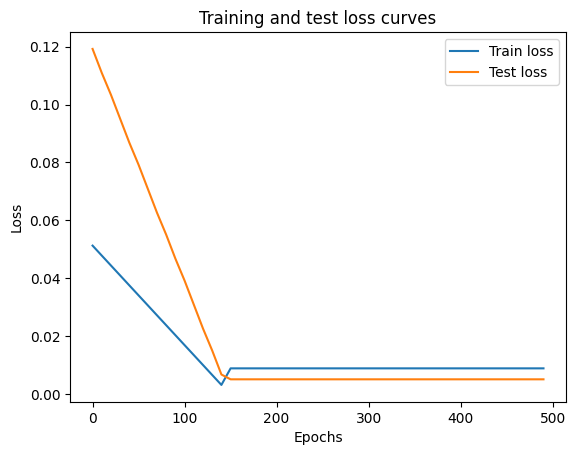

In [29]:
#visualizing results

# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


In [30]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.7013])), ('bias', tensor([0.2906], dtype=torch.float64))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [31]:
#making predictions with a pytorch model (INFERENCE MODE)

#SET MODEL TO EVAL MODE
model_0.eval()

#start inference_mode
with torch.inference_mode():
    y_preds = model_0(x_test)

y_preds

tensor([[0.8516],
        [0.8656],
        [0.8796],
        [0.8936],
        [0.9077],
        [0.9217],
        [0.9357],
        [0.9497],
        [0.9638],
        [0.9778]], dtype=torch.float64)

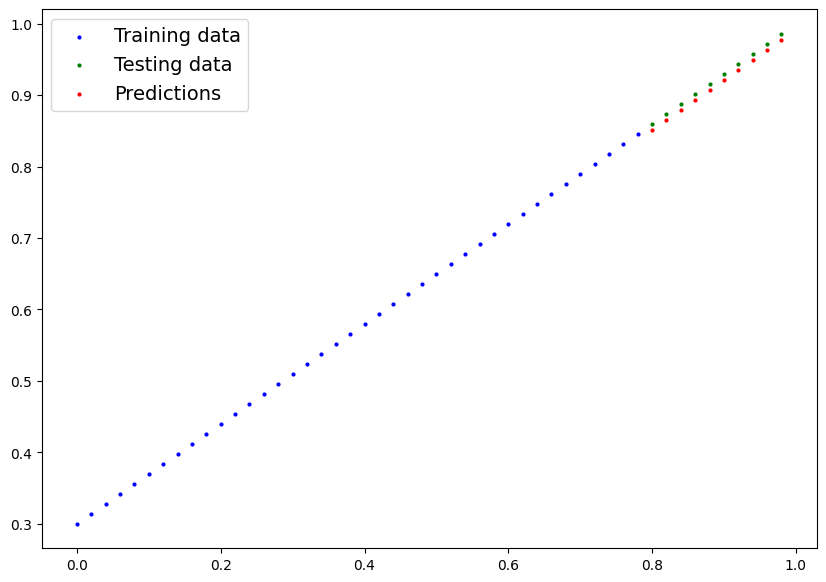

In [32]:
#plot predictions
plot_predictions(predictions = y_preds)